# Param scan analysis

Brief analysis of things

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib widget

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from plotting.paper_figs import ParamScanPlotMeVsHobb
from param_scan.fns.config import config_rand
from param_scan.fns.post_process import PostProcess

# Get processed param scan df

In [5]:
par_str = config_rand['par_str']

In [6]:
data = PostProcess(par_str, '../src/param_scan/outputs').processed_df

In [7]:
data_use = (
    data
    .rename(columns={
        'c_E_maxContEL': 'ESFY_max',
        'c_R_maxContEL': 'ERFB_max',
    })
    .assign(strategy_diff = lambda df: df.ERFB_max - df.ESFY_max)
    .assign(sing_freq_diff = lambda df: np.abs(df.RS - df.SR))
)

data_use.head(2)

,run,omega_1,omega_2,theta_1,theta_2,delta_1,delta_2,RR,RS,SR,...,maxAlongContour,c_R_maxCont%,c_E_maxCont%,c_E_lowDoseMax%,min_corner,ERFB_diff_from_opt,ESFY_diff_from_opt,ESFYL_diff_from_opt,strategy_diff,sing_freq_diff
run,,,,,,,,,,,,,,,,,,,,,
0,0,0.810302,0.577590,4.455443,9.199093,0.005928,0.006016,8.218276e-12,1.178267e-08,1.327527e-08,...,True,100.0,100.000000,100.000000,7,0,0,0.0,0,1.492599e-09
1,1,0.964928,0.962023,6.362392,11.416930,0.010140,0.004924,1.307504e-15,2.328451e-06,1.197339e-07,...,True,100.0,94.117647,94.117647,5,0,-1,-1.0,1,2.208717e-06


# Mean difference between stategies

For sufficiently different single resistant frequencies

In [157]:
plt.close('all')

In [163]:
for_paper = (
    data_use
    .loc[:, ['ESFY_max', 'ERFB_max', 'sing_freq_diff', 'strategy_diff']]
    .assign(pc_diff = lambda df: 100*df.strategy_diff/df.ERFB_max)
    .loc[lambda df: df.sing_freq_diff>0.0001]
    .describe()
)

for_paper

,ESFY_max,ERFB_max,sing_freq_diff,strategy_diff,pc_diff
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,9.737288,10.745763,0.000379,1.008475,7.613345
std,2.390966,3.192369,0.000245,1.165719,8.164193
min,5.000000,5.000000,0.000101,0.000000,0.000000
25%,8.000000,8.000000,0.000183,0.000000,0.000000
50%,10.000000,11.000000,0.000286,1.000000,7.692308
75%,11.000000,13.000000,0.000547,2.000000,14.285714
max,15.000000,18.000000,0.000991,4.000000,28.571429


In [164]:
for_paper.loc[['count', 'mean', 'min', 'max']]

,ESFY_max,ERFB_max,sing_freq_diff,strategy_diff,pc_diff
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,9.737288,10.745763,0.000379,1.008475,7.613345
min,5.000000,5.000000,0.000101,0.000000,0.000000
max,15.000000,18.000000,0.000991,4.000000,28.571429


<AxesSubplot:ylabel='Frequency'>

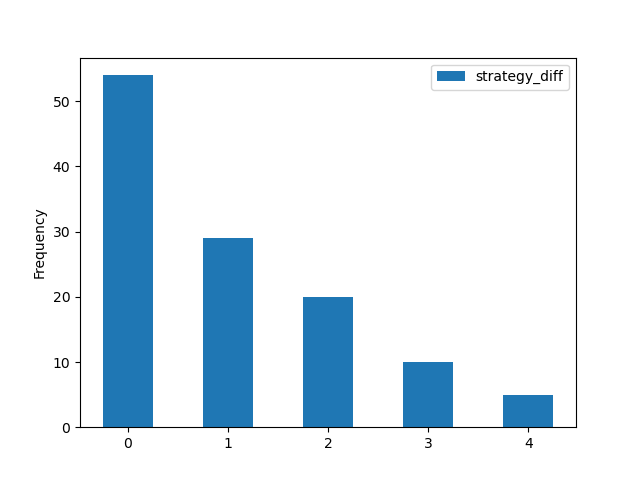

In [145]:
(
    data_use
    .loc[lambda df: df.sing_freq_diff>0.0001]
    .loc[:, ['strategy_diff']]
    .plot.hist(bins = np.arange(-0.25, 4.25 + 0.5, 0.5))
)

In [162]:
(
    data_use
    .assign(diff_from_opt = lambda df: df.max_grid_EL - df.ERFB_max)
    .loc[lambda df: df.sing_freq_diff>0.0001]
    .diff_from_opt
    .value_counts()
    # .plot.hist()
)

0    116
1      2
Name: diff_from_opt, dtype: int64

# Benefit by proportion of sex

<AxesSubplot:xlabel='sr_prop', ylabel='strategy_diff'>

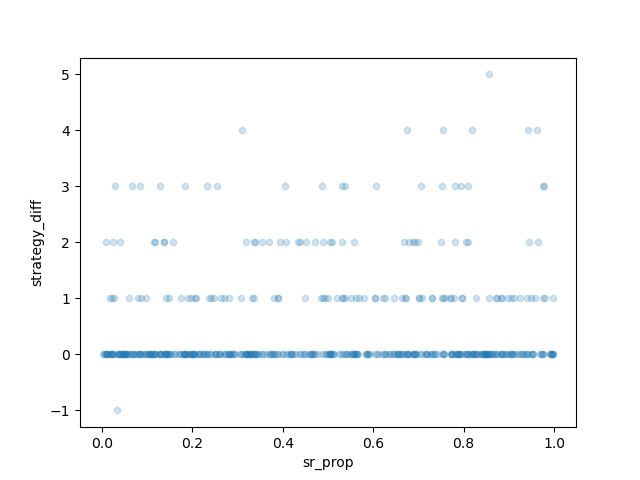

In [107]:
(
    data_use
    # .corr()
    # .loc[['sr_prop'], ['strategy_diff']]
    .plot.scatter(x='sr_prop', y='strategy_diff', alpha=0.2)
)

# Failed runs

In [8]:
(
    data_use
    
    .assign(ED = lambda df: df.max_grid_EL - df.ERFB_max)
    .loc[lambda df: df.ED>0]
    .iloc[:, np.arange(12)]
    .drop('run', axis=1)
    .drop([10, 116, 295])
    .T
    # .assign(ED2 = lambda df: df.ERFB_diff_from_opt + df.ED)
    # .describe()
    # .loc[['min', 'max']]
    # .T
    # .hist(
)

run,91,183,227,241,478
omega_1,4.923172e-01,8.124905e-01,8.152626e-01,8.145264e-01,9.241962e-01
omega_2,6.377302e-01,6.927804e-01,6.751034e-01,8.069685e-01,9.308588e-01
theta_1,6.816520e+00,2.951951e+00,1.025926e+01,7.407919e+00,4.753716e+00
theta_2,9.333866e+00,7.009989e+00,3.628018e+00,9.627502e+00,1.008394e+01
delta_1,3.854415e-03,4.001384e-03,1.315202e-02,1.155997e-02,1.222725e-02
delta_2,9.849157e-03,6.770757e-03,5.064948e-03,4.592757e-03,4.933168e-03
RR,7.540441e-08,1.165713e-09,1.679725e-09,3.379948e-09,2.632505e-10
RS,2.332734e-05,5.311738e-10,2.214624e-09,8.008551e-09,1.153372e-09
SR,2.697823e-06,1.312246e-10,5.736566e-04,2.206591e-05,5.557970e-08
SS,9.999739e-01,1.000000e+00,9.994263e-01,9.999779e-01,9.999999e-01
